### Target:
    
    - Add Batch Normalisation to increase efficiency.

### Results:

    - Model has 7979 parameters.

    - Train Accuracy = 99.34

    - Test Accuracy = 99.24

### Analysis:

    - Model has started overfitting again slightly as train and text accuracies are diverging.

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: cuda


In [ ]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [ ]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from model import Model4 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model4                                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 10, 28, 28]          --                             --
│    └─Conv2d: 2-1                       [32, 1, 28, 28]           [32, 9, 28, 28]           81                          1.02%
│    └─ReLU: 2-2                         [32, 9, 28, 28]           [32, 9, 28, 28]           --                             --
│    └─BatchNorm2d: 2-3                  [32, 9, 28, 28]           [32, 9, 28, 28]           18                          0.23%
│    └─Conv2d: 2-4                       [32, 9, 28, 28]           [32, 10, 28, 28]          810                        10.15%
│    └─ReLU: 2-5                         [32, 10, 28, 28]          [32, 10, 28, 28]          --                

In [ ]:
from utils import train, test

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.0752 Batch_id=1874 Average Loss=0.1871 Accuracy=94.34: 100%|██████████| 1875/1875 [00:28<00:00, 64.93it/s]


Test set: Average loss: 0.0585, Accuracy: 9823/10000 (98.23%)

Epoch 2


Train: Batch Loss=0.0635 Batch_id=1874 Average Loss=0.0696 Accuracy=97.87: 100%|██████████| 1875/1875 [00:28<00:00, 65.40it/s]


Test set: Average loss: 0.0433, Accuracy: 9859/10000 (98.59%)

Epoch 3


Train: Batch Loss=0.0016 Batch_id=1874 Average Loss=0.0553 Accuracy=98.31: 100%|██████████| 1875/1875 [00:28<00:00, 66.29it/s]


Test set: Average loss: 0.0398, Accuracy: 9873/10000 (98.73%)

Epoch 4


Train: Batch Loss=0.0025 Batch_id=1874 Average Loss=0.0464 Accuracy=98.60: 100%|██████████| 1875/1875 [00:28<00:00, 66.05it/s]


Test set: Average loss: 0.0298, Accuracy: 9898/10000 (98.98%)

Epoch 5


Train: Batch Loss=0.0005 Batch_id=1874 Average Loss=0.0412 Accuracy=98.71: 100%|██████████| 1875/1875 [00:27<00:00, 67.76it/s]


Test set: Average loss: 0.0268, Accuracy: 9912/10000 (99.12%)

Epoch 6


Train: Batch Loss=0.0065 Batch_id=1874 Average Loss=0.0359 Accuracy=98.88: 100%|██████████| 1875/1875 [00:27<00:00, 67.67it/s]


Test set: Average loss: 0.0288, Accuracy: 9914/10000 (99.14%)

Epoch 7


Train: Batch Loss=0.0471 Batch_id=1874 Average Loss=0.0322 Accuracy=98.99: 100%|██████████| 1875/1875 [00:28<00:00, 66.80it/s]


Test set: Average loss: 0.0292, Accuracy: 9908/10000 (99.08%)

Epoch 8


Train: Batch Loss=0.0009 Batch_id=1874 Average Loss=0.0313 Accuracy=98.97: 100%|██████████| 1875/1875 [00:27<00:00, 67.18it/s]


Test set: Average loss: 0.0261, Accuracy: 9909/10000 (99.09%)

Epoch 9


Train: Batch Loss=0.0066 Batch_id=1874 Average Loss=0.0280 Accuracy=99.08: 100%|██████████| 1875/1875 [00:28<00:00, 65.09it/s]


Test set: Average loss: 0.0289, Accuracy: 9903/10000 (99.03%)

Epoch 10


Train: Batch Loss=0.0109 Batch_id=1874 Average Loss=0.0268 Accuracy=99.13: 100%|██████████| 1875/1875 [00:31<00:00, 60.25it/s]


Test set: Average loss: 0.0251, Accuracy: 9920/10000 (99.20%)

Epoch 11


Train: Batch Loss=0.0005 Batch_id=1874 Average Loss=0.0229 Accuracy=99.28: 100%|██████████| 1875/1875 [00:29<00:00, 64.33it/s]


Test set: Average loss: 0.0249, Accuracy: 9924/10000 (99.24%)

Epoch 12


Train: Batch Loss=0.0004 Batch_id=1874 Average Loss=0.0217 Accuracy=99.30: 100%|██████████| 1875/1875 [00:28<00:00, 65.29it/s]


Test set: Average loss: 0.0267, Accuracy: 9917/10000 (99.17%)

Epoch 13


Train: Batch Loss=0.0125 Batch_id=1874 Average Loss=0.0242 Accuracy=99.19: 100%|██████████| 1875/1875 [00:28<00:00, 66.06it/s]


Test set: Average loss: 0.0261, Accuracy: 9914/10000 (99.14%)

Epoch 14


Train: Batch Loss=0.0012 Batch_id=1874 Average Loss=0.0227 Accuracy=99.27: 100%|██████████| 1875/1875 [00:28<00:00, 65.22it/s]


Test set: Average loss: 0.0253, Accuracy: 9917/10000 (99.17%)

Epoch 15


Train: Batch Loss=0.0956 Batch_id=1874 Average Loss=0.0203 Accuracy=99.34: 100%|██████████| 1875/1875 [00:27<00:00, 66.97it/s]


Test set: Average loss: 0.0286, Accuracy: 9908/10000 (99.08%)



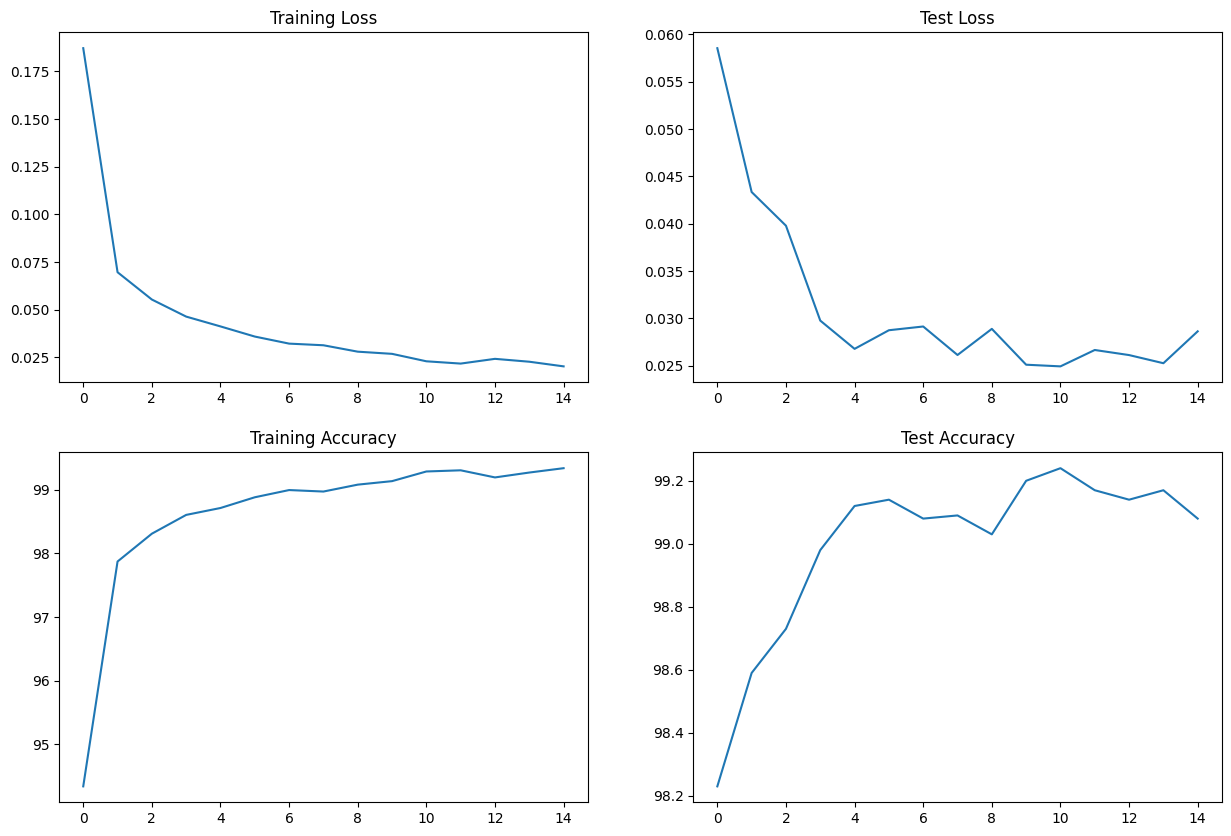

In [ ]:
from utils import plot_stats
plot_stats()

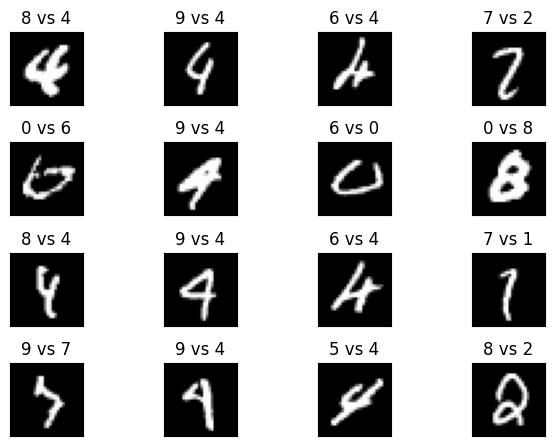

In [ ]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual